# Data Science 3 - Tsinghua University Kim Sumin 金秀珉
# Task - 1

# 0. Preprocessing

In [197]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
from pandas.plotting import scatter_matrix 
import missingno as msno
%matplotlib inline

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize']=(12,8)
Sweetie_Flavour_Original = pd.read_csv("Sweetie Flavour.csv")
Sweetie_Flavour_Original_columns = Sweetie_Flavour_Original.iloc[:,0:19:1]
Sweetie_Flavour_dropped = Sweetie_Flavour_Original.dropna()
print(Sweetie_Flavour_dropped.isnull().sum())


citric_acid            0
residual_sugar         0
density                0
ph                     0
Diacetyl               0
Ethyl_maltol           0
Ethylvanillin          0
Limonene               0
Manzanate              0
Ethyl_acetate          0
Isoamyl_acetate        0
Pentyl_butyrate        0
Octyl_acetate          0
Benzyl_acetate         0
Methyl_anthranilate    0
Myrcene                0
Nerolidol              0
Camphor                0
Flavour_Score          0
dtype: int64


<AxesSubplot:>

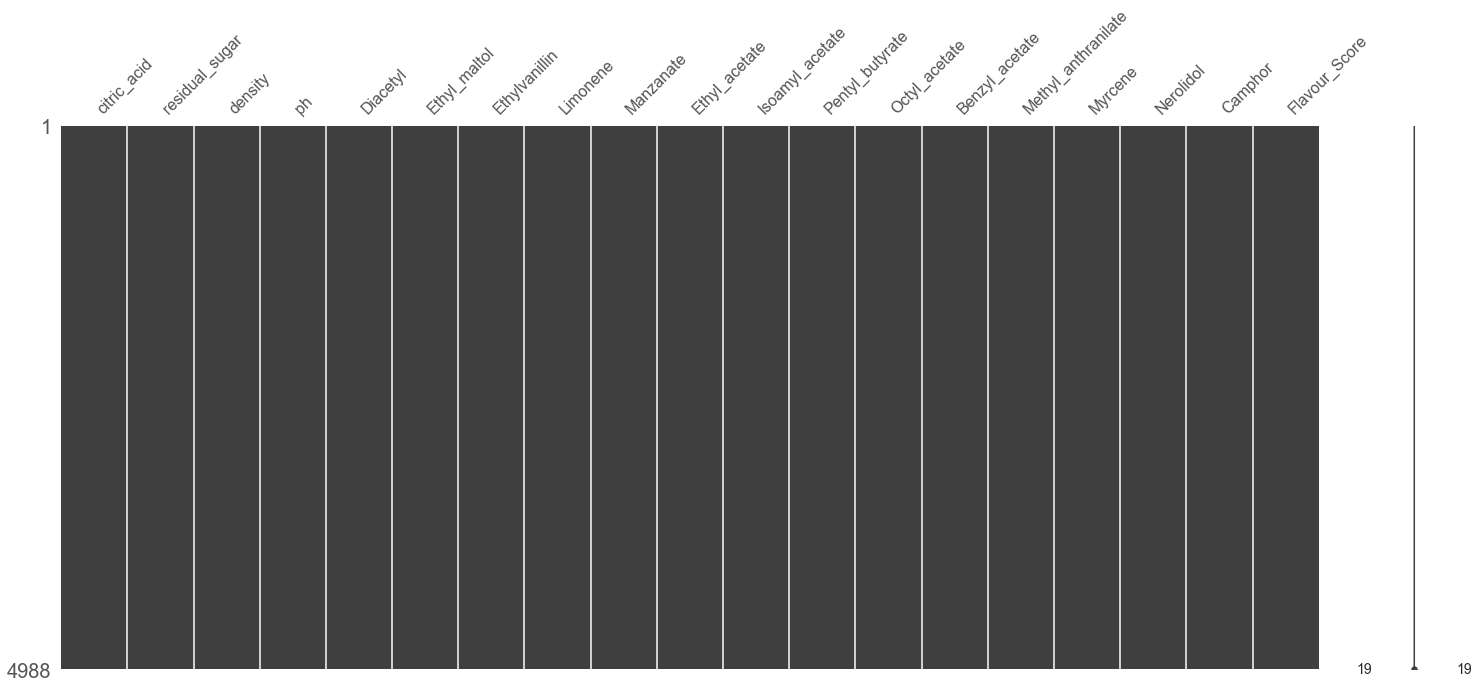

In [198]:
msno.matrix(Sweetie_Flavour_dropped)

# 1. Information about the data

In [199]:
Sweetie_Flavour_dropped.describe()

,citric_acid,residual_sugar,density,ph,Diacetyl,Ethyl_maltol,Ethylvanillin,Limonene,Manzanate,Ethyl_acetate,Isoamyl_acetate,Pentyl_butyrate,Octyl_acetate,Benzyl_acetate,Methyl_anthranilate,Myrcene,Nerolidol,Camphor,Flavour_Score
count,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000
mean,1435.518054,245.039266,1033.417126,451.300928,1497.052301,3345.131087,1131.093877,1100.613755,1500.567150,4445.473309,350.711152,1490.507531,1990.983414,13860.185576,2741.850489,1272.056182,1218.528181,2523.466413,57037.362837
std,986.898128,309.530883,1422.624019,278.472218,1385.216737,347.096250,1142.361808,1224.903604,893.171578,2850.613708,54.786627,1313.344262,1998.850167,19098.277233,1386.607256,525.665181,1567.861947,2052.231739,25264.971827
min,0.000000,0.000000,0.000000,0.000000,0.000000,2129.102000,0.000000,0.000000,0.000000,-2367.257208,149.337000,0.000000,0.000000,-1443.484532,0.000000,0.000000,0.000000,0.000000,9554.236660
25%,656.450000,0.000000,0.000000,246.322500,142.514250,3110.528000,0.000000,0.000000,844.977000,2358.210310,313.274250,227.394000,0.000000,42.005837,1746.313000,910.305000,0.000000,663.752000,38327.590935
50%,1389.850000,106.430000,212.748000,439.170000,1260.004000,3342.499000,884.385000,729.561000,1491.168000,4319.165698,350.446500,1301.697000,1569.078000,2931.245990,2739.066500,1266.012000,478.941000,2309.139500,51524.454885
75%,2108.202000,415.240000,1767.594000,641.700000,2386.699250,3575.059000,1867.342500,1888.740000,2116.054500,6372.822213,388.354500,2400.219000,3319.416000,23777.323490,3701.316000,1635.196500,2132.174000,3989.450250,71872.833303
max,5687.346000,1757.000000,8896.536000,1582.110000,7276.069000,4584.282000,6649.992000,8243.613000,4591.188000,14655.462360,530.523000,6615.594000,10775.412000,119385.702400,8941.977000,2911.356000,9883.086000,10950.342000,181477.020800


In [200]:
Sweetie_Flavour_dropped.any()

citric_acid            True
residual_sugar         True
density                True
ph                     True
Diacetyl               True
Ethyl_maltol           True
Ethylvanillin          True
Limonene               True
Manzanate              True
Ethyl_acetate          True
Isoamyl_acetate        True
Pentyl_butyrate        True
Octyl_acetate          True
Benzyl_acetate         True
Methyl_anthranilate    True
Myrcene                True
Nerolidol              True
Camphor                True
Flavour_Score          True
dtype: bool

array([[<AxesSubplot:xlabel='citric_acid', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='residual_sugar', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='density', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='ph', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Diacetyl', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Ethyl_maltol', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Ethylvanillin', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Limonene', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Manzanate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Ethyl_acetate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Isoamyl_acetate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Pentyl_butyrate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Octyl_acetate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Benzyl_acetate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Methyl_anthranilate', ylabel='citric_acid'>,
  

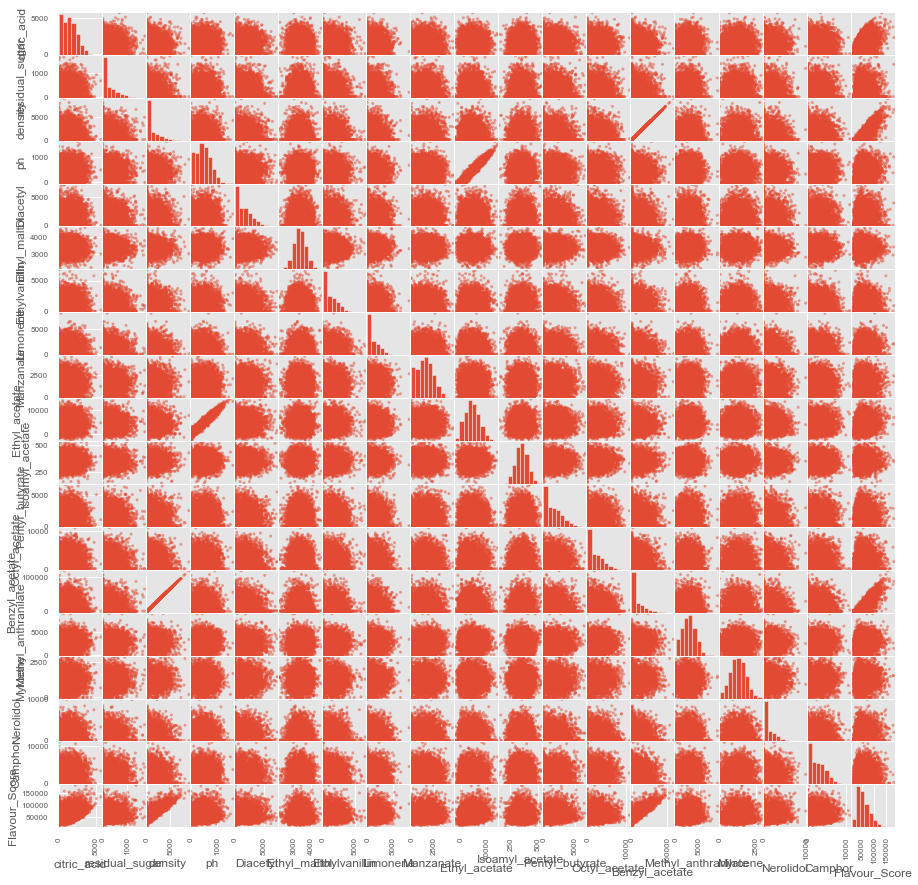

In [201]:
scatter_matrix(Sweetie_Flavour_dropped, figsize=(15, 15))

(19.5, -0.5)

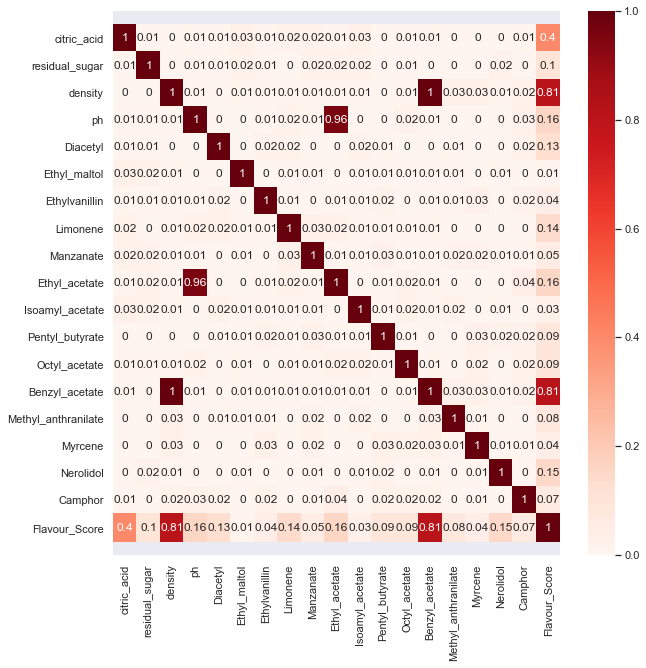

In [202]:
correlation_matrix = np.absolute(Sweetie_Flavour_dropped.corr().round(2))
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
bottom, top = ax. get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

In [203]:
Sweetie_Flavour_dropped.columns

Index(['citric_acid', 'residual_sugar', 'density', 'ph', 'Diacetyl',
       'Ethyl_maltol', 'Ethylvanillin', 'Limonene', 'Manzanate',
       'Ethyl_acetate', 'Isoamyl_acetate', 'Pentyl_butyrate', 'Octyl_acetate',
       'Benzyl_acetate', 'Methyl_anthranilate', 'Myrcene', 'Nerolidol',
       'Camphor', 'Flavour_Score'],
      dtype='object')

# Data analysis  
- density, Benzyl_acetate
- citric_acid

Flavour_Score is strongly correlated with density, Benzyl_acetate ( and also significantly correlated with citric_acid). 
[Benzyle acetate and density] / [Ethyl_actete and ph] are correlated with each other, Therefore we should not use together since we will be 'double counting ' their impact on the result. 


# 2. First Model - Linear Regression

Based on the anlaysis above, i firrst selected two most highly correlated variable and built the model. 
However the score of this model was not as high as i had expected. 
So, i decided to give this model new independent variable set that only excludes two variable( density, Ethyl_actete) to avoid double counting problem. 

In [204]:
X = pd.DataFrame(np.c_[Sweetie_Flavour_dropped['Benzyl_acetate'],Sweetie_Flavour_dropped['citric_acid'] ],columns = ['Benzyl_acetate','citric_acid'])
Y = Sweetie_Flavour_dropped['Flavour_Score']

X_drop = Sweetie_Flavour_dropped.drop(['Flavour_Score','density', 'Ethyl_maltol','Ethylvanillin','Isoamyl_acetate','Pentyl_butyrate','Octyl_acetate','Myrcene','Methyl_anthranilate','Camphor'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
print(X_train[0:5])

      Benzyl_acetate  citric_acid
4528    31071.833900      845.614
1919     -674.159168     1892.628
2443     -272.414604     2929.420
4812    37651.165290     2438.194
2994      372.296107      878.940


In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [206]:
y_train_predict = lin_model.predict(X_train)
r2_train = r2_score(Y_train, y_train_predict )
rmse_train = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))

y_test_predict = lin_model.predict(X_test)
r2_test = r2_score(Y_test,y_test_predict)
rmse_test = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))

print("R2:")
print("Train = ",r2_train)
print("Test = ",r2_test)
print("RMSE:")
print("Train=",rmse_train)
print("Test=",rmse_test)

R2:
Train =  0.8100542020154214
Test =  0.8220478254825019
RMSE:
Train= 10899.20137905561
Test= 11074.15731771447


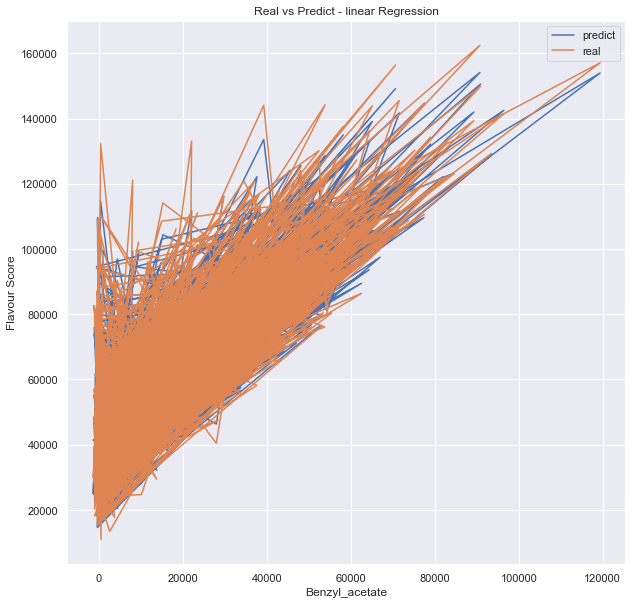

In [207]:
plt.plot(x_test['Benzyl_acetate'],m.predict(x_test),label = "predict" )
plt.plot(x_test['Benzyl_acetate'],y_test,label = "real")
plt.xlabel("Benzyl_acetate")
plt.ylabel("Flavour Score")
plt.legend()
plt.title("Real vs Predict - linear Regression")
plt.show()

In [208]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_drop,Y, test_size = 0.2)

In [209]:
lin_model = LinearRegression()
lin_model.fit(X_train1,Y_train1)
y_train_predict1 = lin_model.predict(X_train1)
r2_train1 = r2_score(Y_train1, y_train_predict1 )
rmse_train1 = (np.sqrt(mean_squared_error(Y_train1,y_train_predict1)))

y_test_predict1 = lin_model.predict(X_test1)
r2_test1 = r2_score(Y_test1,y_test_predict1)
rmse_test1 = (np.sqrt(mean_squared_error(Y_test1,y_test_predict1)))

print("R2:")
print("Train = ",r2_train)
print("Test = ",r2_test)
print("RMSE:")
print("Train=",rmse_train1)
print("Test=",rmse_test1)

R2:
Train =  0.8100542020154214
Test =  0.8220478254825019
RMSE:
Train= 7382.271881262996
Test= 7686.396358309555


- Selecting new independent variables set: all columns except density (high correlation with Benzyl_acetate )

In [210]:

X = Sweetie_Flavour_dropped.drop(['density','Flavour_Score'],axis=1)
Y = Sweetie_Flavour_dropped['Flavour_Score']

lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)



y_train_predict = lin_model.predict(X_train)
r2_train = r2_score(Y_train, y_train_predict )
rmse_train = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))

y_test_predict = lin_model.predict(X_test)
r2_test = r2_score(Y_test,y_test_predict)
rmse_test = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))

print("R2:")
print("Train = ",r2_train)
print("Test = ",r2_test)
print("RMSE:")
print("Train=",rmse_train)
print("Test=",rmse_test)


R2:
Train =  0.8100542020154214
Test =  0.8220478254825019
RMSE:
Train= 10899.20137905561
Test= 11074.15731771447


We can notice that we got higher score of 0.93 from 0.81 after setting new Independent variabls (including more rows, while excluding the 'density ' variable to avoid double counting problem.)

# 3. Second Model - Polynomial Regression

Polynomial Regression is more complex model than the first linear regression as it has higher dimension. 
First, i included all independent variables except for 'density' and 'ph', as density showed high correlation with benzyl acetete and Ethyl_acetate. 
Second, i dropped several columns that have low correlation to Flavour Score.
But we can notice that the score of first one is higher than the second one, which means that i dropped columns that actually
have correlations with the Flavour Score. 
Also the second model's first case showed higher score than the linear regression model, compared to 0.945, showing the score of 0.979. 

This model is better than the first model, in terms that this model solved the underfitting problem of the first model.

version -1 : deleting two  independent variables ('density','ph') which were checked to have high correlation 
with density and Ethyl_actete each, in order to prevent double counting problem. 
This showed high score of 0.98, which is the higehst among the models that i used.
Also, the difference between test set score and train set score are also very low, which means it was not overfitted.

In [211]:
from sklearn.preprocessing import PolynomialFeatures


X = Sweetie_Flavour_dropped.drop(['density','ph','Flavour_Score'],axis=1)
Y = Sweetie_Flavour_dropped['Flavour_Score']


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
print(X_train[0:5])

poly_features = PolynomialFeatures(degree =3)
X_train_poly = poly_features.fit_transform(X_train)


      citric_acid  residual_sugar  Diacetyl  Ethyl_maltol  Ethylvanillin  \
2549     1536.986            0.00  1992.777      3452.794       1471.248   
3627     2231.208          283.66  2061.158      3615.282       1491.678   
4025      909.530          309.50     0.000      3776.592       1174.986   
4593      404.358            0.00  2359.553      3414.490          0.000   
4916     2280.570            0.00  2038.738      3104.410       1403.748   

      Limonene  Manzanate  Ethyl_acetate  Isoamyl_acetate  Pentyl_butyrate  \
2549   331.023   1557.360    3087.262704          323.649         1309.932   
3627  4951.947   1287.678    4845.803797          318.978            0.000   
4025  1598.310      0.000    4101.172865          443.853          346.392   
4593     0.000   1461.516     808.963954          320.976         4413.366   
4916     0.000    406.938    1088.445189          457.839            0.000   

      Octyl_acetate  Benzyl_acetate  Methyl_anthranilate   Myrcene  Neroli

In [212]:
X_train_poly[0:5]

array([[1.00000000e+00, 1.53698600e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.90672704e+10],
       [1.00000000e+00, 2.23120800e+03, 2.83660000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 5.47023519e+11],
       [1.00000000e+00, 9.09530000e+02, 3.09500000e+02, ...,
        1.48034263e+10, 2.15101193e+10, 3.12552797e+10],
       [1.00000000e+00, 4.04358000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.28057000e+03, 0.00000000e+00, ...,
        1.18841324e+09, 1.04700473e+10, 9.22422321e+10]])

In [213]:
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, Y_train)
print("Model coefficients = ",polynomial_model.coef_)
print("Cosntant term(bias) = ",polynomial_model.intercept_)

Model coefficients =  [ 1.55642455e-02 -4.93964210e+00  2.16460338e+01  3.08311566e+00
 -1.28098811e+01 -8.19294798e+00 -1.10273599e+01 -9.95719458e+00
  2.24285559e+00  1.23618988e+02 -1.44981997e+00 -1.60232432e+00
  5.85156345e-01  1.06487684e-01 -1.44752221e+01  2.52123053e+00
 -1.05965931e+00  2.26386298e-03  1.48066694e-03 -1.69098551e-03
  2.96642149e-03 -1.94742821e-04 -9.03410976e-04  3.91138685e-04
  1.46684482e-04  1.06883539e-02  9.77449501e-04 -1.85958558e-06
  5.63780091e-05  7.22309927e-04 -2.01081459e-03 -4.61155824e-04
  2.44895162e-04  6.40814195e-03  1.70436453e-03 -1.38783800e-02
 -3.33465000e-04 -1.38327187e-03 -2.82867559e-03  1.10861886e-04
 -4.07829147e-03 -3.90508100e-05  2.78670326e-03  3.08438742e-06
 -1.63985321e-03  4.23429567e-03  8.99786149e-04  1.18665604e-03
 -1.95236655e-04 -1.62827205e-03  1.15842336e-04  3.92669997e-05
  5.51161916e-04 -3.98806977e-05  1.05230778e-02 -1.97730043e-04
  1.08080116e-04  4.21864123e-05 -7.59143848e-04  1.79804952e-03
 -1

Train =  0.9894838850422547
Test =  0.9817074714319419
RMSE:
Train= 2557.6480837167665
Test= 3579.8177195782105


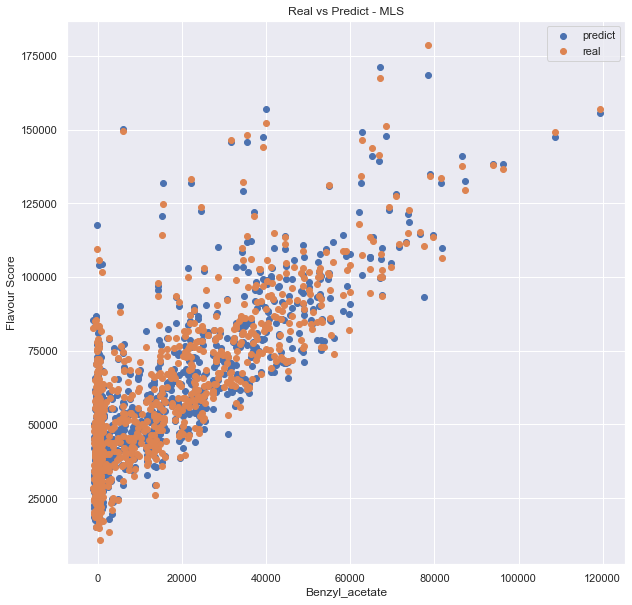

In [214]:
y_train_predicted = polynomial_model.predict(X_train_poly)
y_test_predict = polynomial_model.predict(poly_features.fit_transform(X_test))

rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predicted))
r2_train = r2_score(Y_train,y_train_predicted)

rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
r2_test = r2_score(Y_test,y_test_predict)

print("Train = ",r2_train)
print("Test = ",r2_test)
print("RMSE:")
print("Train=",rmse_train)
print("Test=",rmse_test)

plt.scatter(X_test['Benzyl_acetate'],y_test_predict,label = "predict" )
plt.scatter(X_test['Benzyl_acetate'],Y_test,label = "real")
plt.xlabel("Benzyl_acetate")
plt.ylabel("Flavour Score")
plt.legend()
plt.title("Real vs Predict - MLS")
plt.show()

version 2 - less independent variable are given 
less complex than the verison - 1
Result: Some useful independent variables are removed so underfitting problem happend. 

      citric_acid  residual_sugar      ph  Diacetyl  Limonene  Manzanate  \
4322     1628.110            0.00  813.33     0.000   992.943    702.996   
704      2576.476          687.86  405.84  1465.394     0.000    467.544   
1555        0.000            0.00  645.66  3862.890  2221.380   1019.298   
2399        0.000          428.06   18.12     0.000  4547.802   2255.400   
2872      167.124            0.00  740.64  1598.014     0.000   1986.306   

      Ethyl_acetate  Benzyl_acetate  Nerolidol  
4322    8690.964683      -28.056801   3750.438  
704     3303.975419    34633.333800      0.000  
1555    6254.153294    14092.387370      0.000  
2399    1460.330289    22507.017190      0.000  
2872    6842.750744    31227.823530      0.000  
Model coefficients =  [ 5.47559752e-06  1.58371395e+00  3.16049302e+00  1.89191497e+00
  6.02671180e-01  1.27800011e+00  2.15294267e+00  1.36184592e+00
  1.10174018e+00  1.90799583e+00  2.65578192e-03 -1.16643550e-04
 -2.78757223e-03 -2.17232339e-05

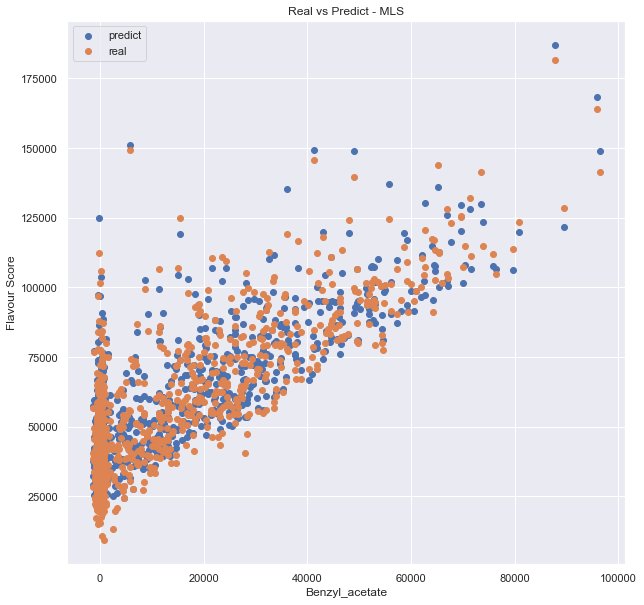

In [215]:
X_drop = Sweetie_Flavour_dropped.drop(['Flavour_Score','density', 'Ethyl_maltol','Ethylvanillin','Isoamyl_acetate','Pentyl_butyrate','Octyl_acetate','Myrcene','Methyl_anthranilate','Camphor'],axis=1)
Y = Sweetie_Flavour_dropped['Flavour_Score']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_drop,Y, test_size = 0.2)
print(X_train[0:5])

poly_features = PolynomialFeatures(degree =3)
X_train_poly = poly_features.fit_transform(X_train)

polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, Y_train)
print("Model coefficients = ",polynomial_model.coef_)
print("Cosntant term(bias) = ",polynomial_model.intercept_)

y_train_predicted = polynomial_model.predict(X_train_poly)
y_test_predict = polynomial_model.predict(poly_features.fit_transform(X_test))

rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predicted))
r2_train = r2_score(Y_train,y_train_predicted)

rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
r2_test = r2_score(Y_test,y_test_predict)

print("Train = ",r2_train)
print("Test = ",r2_test)
print("RMSE:")
print("Train=",rmse_train)
print("Test=",rmse_test)

plt.scatter(X_test['Benzyl_acetate'],y_test_predict,label = "predict" )
plt.scatter(X_test['Benzyl_acetate'],Y_test,label = "real")
plt.xlabel("Benzyl_acetate")
plt.ylabel("Flavour Score")
plt.legend()
plt.title("Real vs Predict - MLS")
plt.show()


# 4. Thrid Model MLPRegression 

A neural network in which one or more hidden layers are added to the form of a single-layer perceptron is called a multi-layer perceptron.
The score of this model is lower than the Polynomial Regression above, which means the model was overfitted. The differnece of the score of trainng set and test set on this  MLP Regressino model also shows this problem.

<class 'sklearn.linear_model._base.LinearRegression'>
0 th train 0.9411157832161915
0 th predict 0.9369663153021186
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
1 th train 0.9883401637699034
1 th predict 0.9743453718788531
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
2 th train 0.9806453373835399
2 th predict 0.9719801274069527
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
3 th train 0.9883401637699034
3 th predict 0.9743453718788531
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
4 th train 0.9844974912209875
4 th predict 0.9743525456513432


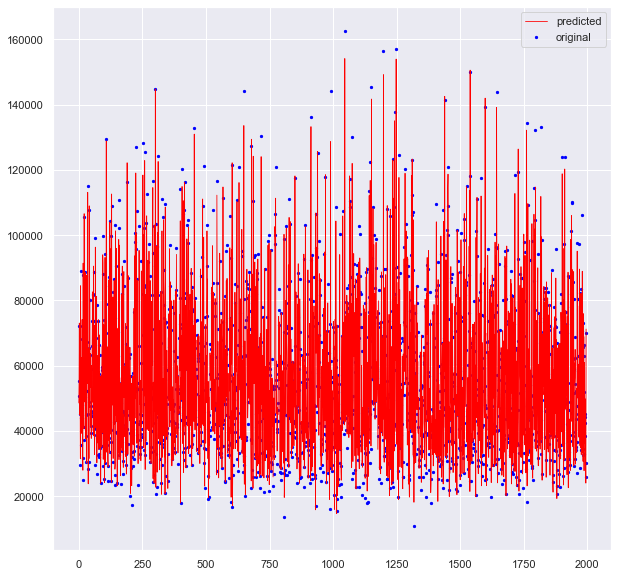

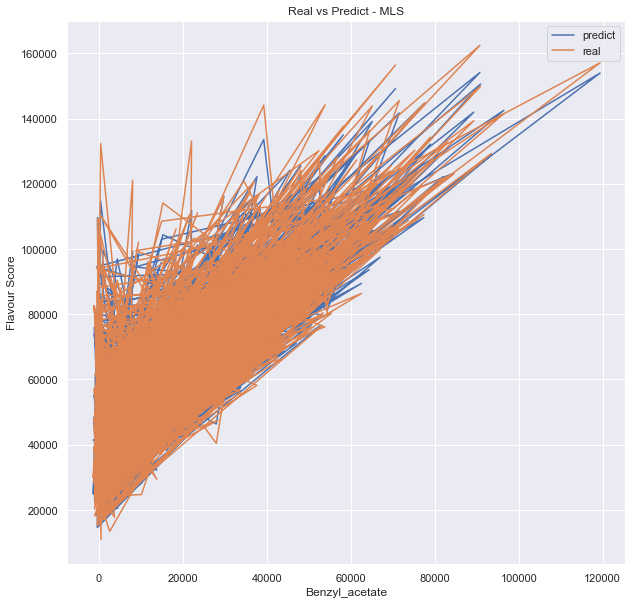

In [216]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.4,
                                                   shuffle = True,
                                                   random_state=1004)
models = [
    LinearRegression(), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=1000, alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[100, 100], max_iter=3000, alpha=0.005, random_state=42)]
    #MLPRegressor(hidden_layer_sizes=[1000,1000], max_iter=5000, alpha=0.0005, random_state=42)]
    #MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, random_state=42)


count = 0 
for m in models:
    m.fit(x_train, y_train)
    print(m.__class__)
    print(count, "th train" , r2_score(y_train, m.predict(x_train)))
    print(count,"th predict",r2_score(y_test, m.predict(x_test)))
    count+=1
    
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, m.predict(x_test), lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

plt.plot(x_test['Benzyl_acetate'],m.predict(x_test),label = "predict" )
plt.plot(x_test['Benzyl_acetate'],y_test,label = "real")
plt.xlabel("Benzyl_acetate")
plt.ylabel("Flavour Score")
plt.legend()
plt.title("Real vs Predict - MLS")
plt.show()
